# Attempt at background removal using simple clustering methods

Assumption: The background is a reasonably uniform color and has good contrast with the object

Proposed method:
- Cluster image by color
- Assume that the largest single cluster is the background, with possible confounding patches inside the object
- Cluster these pixels spatially
- Assume the largest cluster is the background

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2hsv

In [37]:
img = Image.open("test2.jpg")
img = np.array(img)
hsv_img = rgb2hsv(img)

(-0.5, 963.5, 1279.5, -0.5)

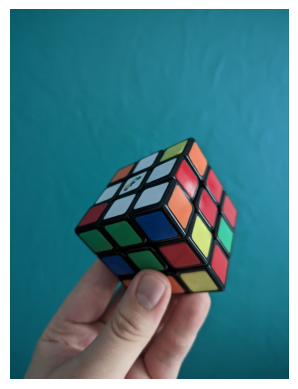

In [38]:
plt.imshow(img)
plt.axis('off')

(-0.5, 963.5, 1279.5, -0.5)

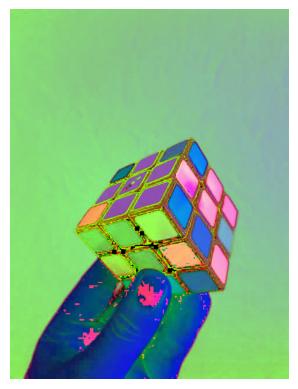

In [39]:
plt.imshow(hsv_img)
plt.axis('off')

In [40]:
def delta(a: np.ndarray, b: np.ndarray) -> float:
    return np.sqrt(np.sum(np.square(a-b)))

def mask_bg(img: np.ndarray, hue_delta: float = 0.1) -> np.ndarray:
    mask = np.zeros((img.shape[0], img.shape[1]))
    visited = np.zeros_like(mask)
    queued = np.zeros_like(mask)

    stack = [(0,0)]
    queued[0,0] = 1

    while len(stack) != 0:
        r,c = stack.pop()
        visited[r,c] = 1
        mask[r,c] = 1

        neighbors = [(r + dr, c + dc) for dr in range(-1,2) for dc in range(-1,2)]
        for nr, nc in neighbors:
            if nr < mask.shape[0] and nc < mask.shape[1] and visited[nr, nc] == 0 and queued[nr, nc] == 0:
                if (delta(img[r,c], img[nr,nc]) <= hue_delta):
                    stack.append((nr, nc))
                    queued[nr, nc] = 1

    return mask

In [43]:
mask = mask_bg(hsv_img, 0.02)

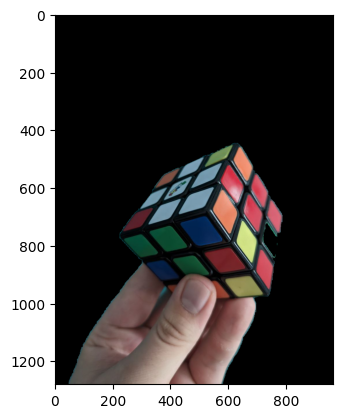

In [44]:
masked = img.copy()
masked[mask == 1] = 0
plt.imshow(masked)